In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('amazon.csv', encoding='ISO-8859-1')

In [3]:
pd.set_option('display.max_columns', None) 

In [4]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided,Computers&Accessories,$399,"$1,099",64%,4.2,"24,269",High Compatibility :,AG3D6O4STA,"Manav,Adar",R3HXWT0LRP,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable,Computers&Accessories,$199,$349,43%,4,"43,994",Compatible with all,AECPFYFQVR,"ArdKn,Nirb",RGIQEG07R9,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Ch,Computers&Accessories,$199,"$1,899",90%,3.9,"7,928",ã Fast Charger& Da,AGU3BBQ2V2,"Kunal,Hima",R3J3EQQ9TZ,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2,Computers&Accessories,$329,$699,53%,4.2,"94,363",The boAt Deuce USB 3,AEWAZDZZJL,Omkar dhal,R3EEUZKKK9,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L,Computers&Accessories,$154,$399,61%,4.2,"16,905",[CHARGE & SYNC FUNCT,AE3Q6KSUK5,rahuls6099,R1BP4L2HH9,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_content',
       'img_link', 'product_link'],
      dtype='object')

In [6]:
print(f"The Number of Row are {df.shape[0]}, and columns are {df.shape[1]}")

The Number of Row are 1465, and columns are 15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_content       1465 non-null   object
 13  img_link             1465 non-null   object
 14  product_link         1465 non-null   object
dtypes: object(15)
memory usage: 171.8+ KB


In [64]:
# Clean up price columns
df['discounted_price'] = df['discounted_price'].replace('[\$,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[\$,]', '', regex=True).astype(float)

# Ensure the column is treated as string before string operations
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False).astype(float)

# Convert rating to float safely
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Clean up rating count
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)

# Confirm conversion
print(df.dtypes)


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_content          object
img_link                object
product_link            object
dtype: object


In [8]:
df['discounted_price'] = df['discounted_price'].str.replace("$",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("$",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [9]:
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].astype(str).str.replace('%', ''), errors='coerce')
df['discount_percentage'] = df['discount_percentage'] / 100

In [10]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4      181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3        4
3.1      4
5        3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
2.6      1
2.9      1
Name: count, dtype: int64

In [11]:
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Va,Home&Kitchen|Kitchen&,2099.0,2499.0,0.16,|,992,No Installation is p,AGTDSNT2FK,"Divya,Dr N",R2KKTKM4M9,"Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [12]:
df['rating'] = df['rating'].astype(str).str.replace('|', '3.9').astype('float64')
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype('float64')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_content       1465 non-null   object 
 13  img_link             1465 non-null   object 
 14  product_link         1465 non-null   object 
dtypes: float64(5), object(10)
memory usage

In [14]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [15]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_content         0
img_link               0
product_link           0
dtype: int64

In [16]:
df.isnull().sum().sum()

2

In [17]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solim,Computers&Accessories,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: Th,AE7CFHY23V,Pranav,RUB7U91HVZ,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,REDTECH USB-C to Lig,Computers&Accessories,249.0,999.0,0.75,5.0,NaN,ð[The Fastest Cha,AGJC5O5H5B,Abdul Gafu,RQXD5SAMMP,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [18]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

x = df['rating_count'].mean()
xceil = math.ceil(x)
df['rating_count'].fillna(value=xceil, inplace=True)

print("Mean of rating_count:", x)
print("Ceiling of mean:", xceil)

Mean of rating_count: 18295.541353383458
Ceiling of mean: 18296


In [19]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_content         0
img_link               0
product_link           0
dtype: int64

In [20]:
df.duplicated().any()

True

In [21]:
print(df.duplicated().sum())

40


In [22]:
print(df.drop_duplicates(inplace=True))

None


In [23]:
#Display the details of product id with the highest and lowest actual price
highest_actual_price = df.loc[df['actual_price'].idxmax()]
print(" Product id with highest actual price:")
print(highest_actual_price)

lowest_actual_price = df.loc[df['actual_price'].idxmax()]
print(" Product id with lowest actual price:")
print(lowest_actual_price)

 Product id with highest actual price:
product_id                                                    B09WN3SRC7
product_name                                        Sony Bravia 164 cm (
category                                           Electronics|HomeTheat
discounted_price                                                 77990.0
actual_price                                                    139900.0
discount_percentage                                                 0.44
rating                                                               4.7
rating_count                                                      5935.0
about_product                                       Resolution: 4K Ultra
user_id                                                       AF6Z2OYIXR
user_name                                                     David P.,D
review_id                                                     R16HCZ0W1T
review_content         The delivery people were not careful with the ...
img_link    

In [24]:
#Increase all columns by 25 % (numarical columns)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['discounted_price'].fillna(0, inplace=True)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce') 
df['actual_price'].fillna(0, inplace=True)

df['discounted_price'] = df['discounted_price'] * 1.25
df['actual_price'] = df['actual_price'] * 1.25

print(df[['product_id', 'discounted_price', 'actual_price']].head())


   product_id  discounted_price  actual_price
0  B07JW9H4J1            498.75       1373.75
1  B098NS6PVG            248.75        436.25
2  B096MSW6CT            248.75       2373.75
3  B08HDJ86NZ            411.25        873.75
4  B08CF3B7N1            192.50        498.75


In [25]:
categoryUnique = df['category'].unique()
print(categoryUnique)

['Computers&Accessories' 'Electronics|HomeTheat' 'Electronics|HomeAudio'
 'Electronics|WearableT' 'Electronics|Mobiles&A' 'Electronics|Accessori'
 'Electronics|Headphone' 'MusicalInstruments|Mi' 'Electronics|GeneralPu'
 'OfficeProducts|Office' 'Home&Kitchen|CraftMat' 'Electronics|Cameras&P'
 'HomeImprovement|Elect' 'Toys&Games|Arts&Craft' 'Electronics|PowerAcce'
 'Home&Kitchen|Kitchen&' 'Home&Kitchen|Heating,' 'Home&Kitchen|HomeStor'
 'Car&Motorbike|CarAcce' 'Health&PersonalCare|H']


In [26]:
# Clean the 'category' column
df['category'] = (
    df['category']
    .str.lower() 
    .str.strip()  
    .str.replace('&', ' ')  
    .str.replace('|', ' ') 
    .str.replace(r'\b\w{1,3}\b', '', regex=True)  
    .str.replace(r'\s+', ' ', regex=True)  
    .str.strip()  
)

df = df.dropna(subset=['category'])
df = df[df['category'] != '']

unique_categories = df['category'].unique()
unique_categories = [cat.strip() for cat in unique_categories]  
unique_categories = list(set(unique_categories))  

print("Unique cleaned categories:")
print(unique_categories)

Unique cleaned categories:
['electronics homeaudio', 'motorbike caracce', 'electronics generalpu', 'electronics hometheat', 'home kitchen heating,', 'computers accessories', 'electronics poweracce', 'electronics headphone', 'electronics cameras', 'electronics wearablet', 'toys games arts craft', 'electronics mobiles', 'musicalinstruments', 'officeproducts office', 'home kitchen kitchen', 'home kitchen homestor', 'health personalcare', 'homeimprovement elect', 'home kitchen craftmat', 'electronics accessori']


In [27]:
print(df['category'].value_counts())
print('Number of unique values in category is:', df['category'].nunique())

category
computers accessories    421
home kitchen kitchen     309
electronics hometheat    160
electronics mobiles      156
home kitchen heating,    116
electronics wearablet     75
electronics headphone     66
officeproducts office     31
electronics homeaudio     16
home kitchen homestor     16
electronics cameras       16
electronics accessori     14
electronics generalpu     14
home kitchen craftmat      7
homeimprovement elect      2
musicalinstruments         2
electronics poweracce      1
toys games arts craft      1
motorbike caracce          1
health personalcare        1
Name: count, dtype: int64
Number of unique values in category is: 20


In [28]:
for column in df.columns:
    Mcount = len(df[df[column] == '?'])
    print(f"{column} has {Mcount} ?marks")

product_id has 0 ?marks
product_name has 0 ?marks
category has 0 ?marks
discounted_price has 0 ?marks
actual_price has 0 ?marks
discount_percentage has 0 ?marks
rating has 0 ?marks
rating_count has 0 ?marks
about_product has 0 ?marks
user_id has 0 ?marks
user_name has 0 ?marks
review_id has 0 ?marks
review_content has 0 ?marks
img_link has 0 ?marks
product_link has 0 ?marks


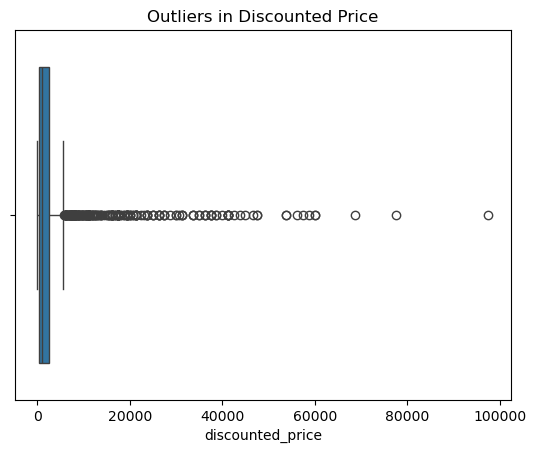

In [29]:
sns.boxplot(x=df['discounted_price'])
plt.title('Outliers in Discounted Price')
plt.show()

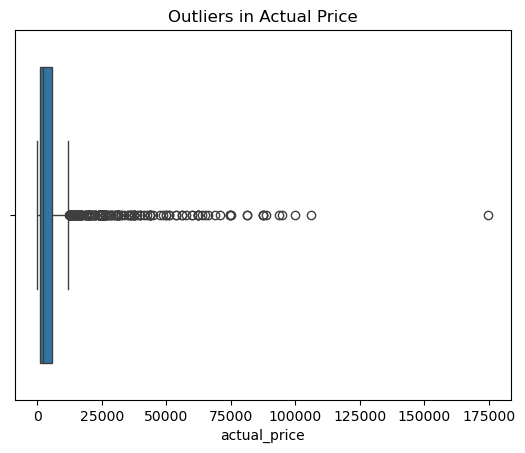

In [30]:
sns.boxplot(x=df['actual_price'])
plt.title('Outliers in Actual Price')
plt.show()

In [31]:
sns.boxplot(y=df['discount_percentage'])
plt.title('Boxplot for Discount Percentage')

Text(0.5, 1.0, 'Boxplot for Discount Percentage')

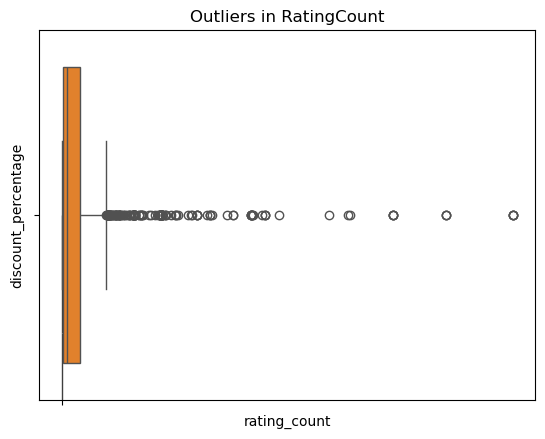

In [32]:
sns.boxplot(x=df['rating_count'])
plt.title('Outliers in RatingCount')
plt.show()

In [33]:
# Outliers of discount_price:
upper_limit_discounted_price = round(df['discounted_price'].mean() + 3 * df['discounted_price'].std(), 2)  
lower_limit_discounted_price = round(df['discounted_price'].mean() - 3 * df['discounted_price'].std(), 2)  

print('Upper limit no. of Discount Price:', upper_limit_discounted_price)
print('Lower limit no. of Discount Price:', lower_limit_discounted_price)

outliers = df[(df['discounted_price'] > upper_limit_discounted_price) | (df['discounted_price'] < lower_limit_discounted_price)]
print('Number of outliers:', len(outliers))

print("Records of outliers:")
print(outliers[['discounted_price']])

Upper limit no. of Discount Price: 30316.81
Lower limit no. of Discount Price: -22344.41
Number of outliers: 41
Records of outliers:
      discounted_price
38            41248.75
61            41237.50
72            33748.75
85            37498.75
86            34998.75
87            38737.50
91            31248.75
108           47498.75
124           41248.75
135           38737.50
150           37487.50
171           41248.75
192           59987.50
197           31248.75
216           53748.75
231           39998.75
232           41237.50
249           97487.50
255           68737.50
270           44998.75
276           57498.75
283           59987.50
292           41237.50
295           37498.75
306           33748.75
323           31237.50
325           77498.75
326           30623.75
332           58748.75
339           36248.75
340           36248.75
394           36248.75
406           42498.75
410           43748.75
533           56248.75
544           37487.50
568           47

In [34]:
# Outliers of actual_price:
upper_limit_actual_price = round(df['actual_price'].mean() + 3 * df['actual_price'].std(), 2)  
lower_limit_actual_price = round(df['actual_price'].mean() - 3 * df['actual_price'].std(), 2)  

print('Upper limit no. of Actual Price:', upper_limit_actual_price)
print('Lower limit no. of Actual Price:', lower_limit_actual_price)

outliers = df[(df['actual_price'] > upper_limit_actual_price) | (df['actual_price'] < lower_limit_actual_price)]
print('Number of outliers:', len(outliers))

print("Records of outliers:")
print(outliers[['actual_price']])

Upper limit no. of Actual Price: 48156.51
Lower limit no. of Actual Price: -34294.98
Number of outliers: 37
Records of outliers:
      actual_price
38        57498.75
61        59875.00
72        53748.75
85        49998.75
86        51237.50
87        66125.00
94        51237.50
108       81250.00
123       56237.50
124       56248.75
135       62487.50
150       81250.00
171       59987.50
192       88625.00
216       74998.75
231       62498.75
232       70987.50
249      174875.00
255      106250.00
270       62487.50
276       87375.00
283       99987.50
292       68737.50
295       63748.75
306       53748.75
323       64987.50
325       87498.75
326       62500.00
332       87498.75
410       48748.75
533       62498.75
544       49987.50
568       93748.75
1014      74862.50
1182      74875.00
1306      74875.00
1354      94987.50


In [35]:
# Outliers of discount_percentage:
upper_limit_discount_percentage = round(df['discount_percentage'].mean() + 3 * df['discount_percentage'].std(), 2)  
lower_limit_discount_percentage = round(df['discount_percentage'].mean() - 3 * df['discount_percentage'].std(), 2)  

print('Upper limit no. of discount percentage:', upper_limit_discount_percentage)
print('Lower limit no. of discount percentage:', lower_limit_discount_percentage)

outliers = df[(df['discount_percentage'] > upper_limit_discount_percentage) | (df['actual_price'] < lower_limit_discount_percentage)]
print('Number of outliers:', len(outliers))

print("Records of outliers:")
print(outliers[['actual_price']])

Upper limit no. of discount percentage: 1.12
Lower limit no. of discount percentage: -0.18
Number of outliers: 0
Records of outliers:
Empty DataFrame
Columns: [actual_price]
Index: []


In [36]:
# Outliers of rating_count:
upper_limit_rating_count = round(df['rating_count'].mean() + 3 * df['rating_count'].std(), 2)  
lower_limit_rating_count = round(df['rating_count'].mean() - 3 * df['rating_count'].std(), 2)  

print('Upper limit no. of rating count:', upper_limit_rating_count)
print('Lower limit no. of rating count:', lower_limit_rating_count)

outliers = df[(df['rating_count'] > upper_limit_discount_percentage) | (df['rating_count'] < lower_limit_discount_percentage)]
print('Number of outliers:', len(outliers))

print("Records of outliers:")
print(outliers[['actual_price']])

Upper limit no. of rating count: 148092.02
Lower limit no. of rating count: -111187.24
Number of outliers: 1425
Records of outliers:
      actual_price
0          1373.75
1           436.25
2          2373.75
3           873.75
4           498.75
...            ...
1460       1148.75
1461       3806.25
1462       3850.00
1463       2362.50
1464       4612.50

[1425 rows x 1 columns]


In [37]:
#IQR discounted_price
Q1=df['discounted_price'].quantile(0.25)
Q2=df['discounted_price'].quantile(0.75)
IQR = Q2-Q1
print('IQR', IQR)

lower_limit1_discounted_price = Q1 - 1.5 * IQR
upper_limit1_discounted_price = Q2+ 1.5 * IQR

print('Lower Limit discounted price:', round(lower_limit1_discounted_price, 2))
print('Upper Limit discounted price:', round(upper_limit1_discounted_price, 2))


outliers = df[(df['discounted_price'] > lower_limit1_discounted_price) | (df['discounted_price'] < lower_limit1_discounted_price)]
print('Number of outliers:', len(outliers))
print("Records of outliers:")
print(outliers[['discounted_price']])

IQR 2128.75
Lower Limit discounted price: -2780.62
Upper Limit discounted price: 5734.38
Number of outliers: 1425
Records of outliers:
      discounted_price
0               498.75
1               248.75
2               248.75
3               411.25
4               192.50
...                ...
1460            473.75
1461           2850.00
1462           2773.75
1463           1748.75
1464           3578.75

[1425 rows x 1 columns]


In [38]:
#IQR actual_price
Q1=df['actual_price'].quantile(0.25)
Q2=df['actual_price'].quantile(0.75)
IQR = Q2-Q1
print('IQR', IQR)

lower_limit1_actual_price = Q1 - 1.5 * IQR
upper_limit1_actual_price = Q2+ 1.5 * IQR

print('Lower Limit actual price:', round(lower_limit1_actual_price, 2))
print('Upper Limit actual price:', round(upper_limit1_actual_price, 2))


outliers = df[(df['actual_price'] > lower_limit1_actual_price) | (df['actual_price'] < lower_limit1_actual_price)]
print('Number of outliers:', len(outliers))
print("Records of outliers:")
print(outliers[['actual_price']])

IQR 4542.5
Lower Limit actual price: -5737.5
Upper Limit actual price: 12432.5
Number of outliers: 1425
Records of outliers:
      actual_price
0          1373.75
1           436.25
2          2373.75
3           873.75
4           498.75
...            ...
1460       1148.75
1461       3806.25
1462       3850.00
1463       2362.50
1464       4612.50

[1425 rows x 1 columns]


In [39]:
max_actual_price = df['actual_price'].max()
print('max of actual price:', max_actual_price)

min_actual_price = df['actual_price'].min()
print('min of actual price:', min_actual_price)

max of actual price: 174875.0
min of actual price: 48.75


In [40]:
#IQR discount_percentage
Q1=df['discount_percentage'].quantile(0.25)
Q2=df['discount_percentage'].quantile(0.75)
IQR = Q2-Q1
print('IQR', IQR)

lower_limit1_discount_percentage = Q1 - 1.5 * IQR
upper_limit1_discount_percentage = Q2+ 1.5 * IQR

print('Lower Limit discount percentage:', round(lower_limit1_discount_percentage, 2))
print('Upper Limit discount percentage:', round(upper_limit1_discount_percentage, 2))


outliers = df[(df['discount_percentage'] > lower_limit1_discount_percentage) | (df['discount_percentage'] < lower_limit1_discount_percentage)]
print('Number of outliers:', len(outliers))
print("Records of outliers:")
print(outliers[['discount_percentage']])

IQR 0.31
Lower Limit discount percentage: -0.14
Upper Limit discount percentage: 1.1
Number of outliers: 1425
Records of outliers:
      discount_percentage
0                    0.64
1                    0.43
2                    0.90
3                    0.53
4                    0.61
...                   ...
1460                 0.59
1461                 0.25
1462                 0.28
1463                 0.26
1464                 0.22

[1425 rows x 1 columns]


In [41]:
max_discount_percentage = df['discount_percentage'].max()
print('max of discount percentage:', max_discount_percentage)

min_discount_percentage = df['discount_percentage'].min()
print('min of discount percentage:', min_discount_percentage)

max of discount percentage: 0.94
min of discount percentage: 0.0


In [42]:
#IQR rating_count
Q1=df['rating_count'].quantile(0.25)
Q2=df['rating_count'].quantile(0.75)
IQR = Q2-Q1
print('IQR', IQR)

lower_limit1_rating_count = Q1 - 1.5 * IQR
upper_limit1_rating_count = Q2+ 1.5 * IQR

print('Lower Limit rating_count:', round(lower_limit1_rating_count, 2))
print('Upper Limit rating_count:', round(upper_limit1_rating_count, 2))


outliers = df[(df['rating_count'] > lower_limit1_rating_count) | (df['rating_count'] < lower_limit1_rating_count)]
print('Number of outliers:', len(outliers))
print("Records of outliers:")
print(outliers[['rating_count']])

IQR 16213.0
Lower Limit rating_count: -23138.5
Upper Limit rating_count: 41713.5
Number of outliers: 1425
Records of outliers:
      rating_count
0          24269.0
1          43994.0
2           7928.0
3          94363.0
4          16905.0
...            ...
1460        1090.0
1461        4118.0
1462         468.0
1463        8031.0
1464        6987.0

[1425 rows x 1 columns]


In [43]:
max_rating_count = df['rating_count'].max()
print('max of rating count:', max_rating_count)

min_rating_count = df['rating_count'].min()
print('min of rating count:', min_rating_count)

max of rating count: 426973.0
min of rating count: 2.0


In [44]:
df['discounted_price'] = np.where(df['discounted_price'] > upper_limit_discounted_price,upper_limit_discounted_price, 
                         np.where(df['discounted_price'] < lower_limit_discounted_price,lower_limit_discounted_price, 
                                  df['discounted_price']))


df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,3570.334911,6930.763404,0.473375,4.094386,18452.392281
std,6609.434560,13741.915859,0.216355,0.292887,43213.210258
min,48.750000,48.750000,0.000000,2.000000,2.000000
25%,412.500000,1076.250000,0.320000,4.000000,1181.000000
50%,1061.237500,2123.750000,0.500000,4.100000,5178.000000
75%,2541.250000,5618.750000,0.630000,4.300000,17394.000000
max,30316.810000,174875.000000,0.940000,5.000000,426973.000000


In [45]:
df['actual_price'] = np.where(df['actual_price'] > upper_limit_actual_price,upper_limit_actual_price, 
                         np.where(df['actual_price'] < lower_limit_actual_price,lower_limit_actual_price, 
                                  df['actual_price']))


df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,3570.334911,6301.443839,0.473375,4.094386,18452.392281
std,6609.434560,10375.106026,0.216355,0.292887,43213.210258
min,48.750000,48.750000,0.000000,2.000000,2.000000
25%,412.500000,1076.250000,0.320000,4.000000,1181.000000
50%,1061.237500,2123.750000,0.500000,4.100000,5178.000000
75%,2541.250000,5618.750000,0.630000,4.300000,17394.000000
max,30316.810000,48156.510000,0.940000,5.000000,426973.000000


In [46]:
df['discounted_price'] = np.where(df['discount_percentage'] > upper_limit_discount_percentage,upper_limit_discount_percentage, 
                         np.where(df['discount_percentage'] < lower_limit_discount_percentage,lower_limit_discount_percentage, 
                                  df['discount_percentage']))


df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,0.473375,6301.443839,0.473375,4.094386,18452.392281
std,0.216355,10375.106026,0.216355,0.292887,43213.210258
min,0.000000,48.750000,0.000000,2.000000,2.000000
25%,0.320000,1076.250000,0.320000,4.000000,1181.000000
50%,0.500000,2123.750000,0.500000,4.100000,5178.000000
75%,0.630000,5618.750000,0.630000,4.300000,17394.000000
max,0.940000,48156.510000,0.940000,5.000000,426973.000000


In [47]:
df['rating_count'] = np.where(df['rating_count'] > upper_limit_rating_count,upper_limit_rating_count, 
                         np.where(df['rating_count'] < lower_limit_rating_count,lower_limit_rating_count, 
                                  df['rating_count']))


df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,0.473375,6301.443839,0.473375,4.094386,16139.408842
std,0.216355,10375.106026,0.216355,0.292887,28732.964266
min,0.000000,48.750000,0.000000,2.000000,2.000000
25%,0.320000,1076.250000,0.320000,4.000000,1181.000000
50%,0.500000,2123.750000,0.500000,4.100000,5178.000000
75%,0.630000,5618.750000,0.630000,4.300000,17394.000000
max,0.940000,48156.510000,0.940000,5.000000,148092.020000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1425 entries, 0 to 1464
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1425 non-null   object 
 1   product_name         1425 non-null   object 
 2   category             1425 non-null   object 
 3   discounted_price     1425 non-null   float64
 4   actual_price         1425 non-null   float64
 5   discount_percentage  1425 non-null   float64
 6   rating               1425 non-null   float64
 7   rating_count         1425 non-null   float64
 8   about_product        1425 non-null   object 
 9   user_id              1425 non-null   object 
 10  user_name            1425 non-null   object 
 11  review_id            1425 non-null   object 
 12  review_content       1425 non-null   object 
 13  img_link             1425 non-null   object 
 14  product_link         1425 non-null   object 
dtypes: float64(5), object(10)
memory usage: 210

In [49]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_content',
       'img_link', 'product_link'],
      dtype='object')


In [50]:

Cdrop = ['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count']

df_cleaned = df.drop(columns=Cdrop)

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1425 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      1425 non-null   object
 1   about_product   1425 non-null   object
 2   user_id         1425 non-null   object
 3   user_name       1425 non-null   object
 4   review_id       1425 non-null   object
 5   review_content  1425 non-null   object
 6   img_link        1425 non-null   object
 7   product_link    1425 non-null   object
dtypes: object(8)
memory usage: 132.5+ KB
None


In [51]:
df.columns = df.columns.str.strip()
columns_to_drop = ['product_id', 'user_id', 'user_name', 'review_id', 'img_link', 'product_link', 'review_content', 'about_product']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')
print("Columns in the cleaned DataFrame:", df_cleaned.columns)

if 'actual_price' not in df_cleaned.columns:
    raise KeyError("'actual_price' is missing. Debug column creation or preprocessing!")

y = df_cleaned['actual_price']
X = df_cleaned.drop(columns=['actual_price'])
print("Features: \n", X.columns)
print("Target: \n", y.name)

Columns in the cleaned DataFrame: Index(['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count'],
      dtype='object')
Features: 
 Index(['product_name', 'category', 'discounted_price', 'discount_percentage',
       'rating', 'rating_count'],
      dtype='object')
Target: 
 actual_price


In [52]:
columns_to_check = ['product_id', 'product_name', 'category', 'about_product', 'user_id', 'user_name','review_id','review_content', 'img_link','product_link']

for col in columns_to_check:
    value_counts_column = df[col].value_counts()
    print(value_counts_column)

product_id
B07JW9H4J1    3
B096MSW6CT    3
B08HDJ86NZ    3
B08WRWPM22    3
B08CDKQ8T6    2
             ..
B08HV25BBQ    1
B09QS9X16F    1
B0B3RS9DNF    1
B0BDYW3RN3    1
B01486F4G6    1
Name: count, Length: 1351, dtype: int64
product_name
Portronics Konnect L    11
Wayona Nylon Braided    10
Ambrane Unbreakable      9
7SEVENÂ® Compatible      8
Fire-Boltt Ninja Cal     6
                        ..
ZEBRONICS Zeb-Comfor     1
boAt Rockerz 370 On      1
ZEBRONICS Zeb-Astra      1
Panasonic CR-2032/5B     1
Borosil Jumbo 1000-W     1
Name: count, Length: 1157, dtype: int64
category
computers accessories    421
home kitchen kitchen     309
electronics hometheat    160
electronics mobiles      156
home kitchen heating,    116
electronics wearablet     75
electronics headphone     66
officeproducts office     31
electronics homeaudio     16
home kitchen homestor     16
electronics cameras       16
electronics accessori     14
electronics generalpu     14
home kitchen craftmat      7
homeimpr

In [53]:
categorical_columns = ['product_id', 'product_name', 'category', 
                       'about_product', 'user_id', 'user_name', 'review_id',
                       'review_content', 'img_link', 'product_link']

for col in categorical_columns:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')  # Handle NaNs

label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

y = df_cleaned['actual_price']
X = df_cleaned.drop(columns=['actual_price'], errors='ignore')
print("\nEncoded Features (X):", X.head())
print("\nEncoded Target (y):", y.head())



Encoded Features (X):    product_name  category  discounted_price  discount_percentage  rating  \
0          1007         0              0.64                 0.64     4.2   
1           101         0              0.43                 0.43     4.0   
2           887         0              0.90                 0.90     3.9   
3          1100         0              0.53                 0.53     4.2   
4           721         0              0.61                 0.61     4.2   

   rating_count  
0       24269.0  
1       43994.0  
2        7928.0  
3       94363.0  
4       16905.0  

Encoded Target (y): 0    1373.75
1     436.25
2    2373.75
3     873.75
4     498.75
Name: actual_price, dtype: float64


In [54]:

categorical_columns = ['product_id', 'product_name', 'category', 
                       'about_product', 'user_id', 'user_name', 'review_id',
                       'review_content', 'img_link', 'product_link']

for col in categorical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')

label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
    else:
        print(f"Skipping encoding for missing column: '{col}'")

y = df_cleaned['actual_price']
X = df_cleaned.drop(columns=['actual_price'], errors='ignore')
X.columns = X.columns.str.strip()
print("Columns in the feature set (X):", X.columns)

for col in categorical_columns:
    if col in X.columns:
        print(f"\nValue counts for '{col}' after encoding:")
        print(X[col].value_counts())
    else:
        print(f"Column '{col}' is NOT present in the DataFrame!")


Skipping encoding for missing column: 'product_id'
Skipping encoding for missing column: 'about_product'
Skipping encoding for missing column: 'user_id'
Skipping encoding for missing column: 'user_name'
Skipping encoding for missing column: 'review_id'
Skipping encoding for missing column: 'review_content'
Skipping encoding for missing column: 'img_link'
Skipping encoding for missing column: 'product_link'
Columns in the feature set (X): Index(['product_name', 'category', 'discounted_price', 'discount_percentage',
       'rating', 'rating_count'],
      dtype='object')
Column 'product_id' is NOT present in the DataFrame!

Value counts for 'product_name' after encoding:
product_name
721     11
1007    10
101      9
9        8
321      6
        ..
1049     1
1110     1
1046     1
677      1
150      1
Name: count, Length: 1157, dtype: int64

Value counts for 'category' after encoding:
category
0     421
14    309
6     160
7     156
12    116
9      75
4      66
18     31
5      16
13  

In [81]:
#!git add .
#!git commit -m "upload file"
#!git push

[main 6af72af] upload file
 2 files changed, 149 insertions(+), 3 deletions(-)


fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main

To have this happen automatically for branches without a tracking
upstream, see 'push.autoSetupRemote' in 'git help config'.



In [85]:
#!git pull origin main --allow-unrelated-histories

Merge made by the 'ort' strategy.
 ....ML vs traditional programming-checkpoint.ipynb | 1745 ++++++++
 .../2.basics of sklearn-checkpoint.ipynb           |  574 +++
 Day01/1.ML vs traditional programming.ipynb        | 1745 ++++++++
 Day01/2.basics of sklearn.ipynb                    |  574 +++
 .../.ipynb_checkpoints/1.Example-checkpoint.ipynb  | 1135 +++++
 .../2.Basic Linear reg-checkpoint.ipynb            | 1744 ++++++++
 .../3.ML concept-checkpoint.ipynb                  | 4504 ++++++++++++++++++++
 Day02/.ipynb_checkpoints/Day2-checkpoint.ipynb     |    6 +
 Day02/1.Example.ipynb                              | 1135 +++++
 Day02/2.Basic Linear reg.ipynb                     | 1744 ++++++++
 Day02/3.ML concept.ipynb                           | 4504 ++++++++++++++++++++
 .../travel_time_data-checkpoint.csv                |  101 +
 Day02/Data/ComputerHardware/Index                  |    5 +
 Day02/Data/ComputerHardware/computer+hardware.zip  |  Bin 0 -> 4482 bytes
 Day02/Data/Computer

From https://github.com/hibatullah24/Machine_Learning
 * branch            main       -> FETCH_HEAD


In [86]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/hibatullah24/Machine_Learning.git
   1fb1bb1..79302f3  main -> main


In [ ]:
# future update 
#!git add .
#!git commit -m "Your update message"
#!git push

# Day 3


Bais-Variance Trade-Off in Polynomial Regression

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [88]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_content',
       'img_link', 'product_link'],
      dtype='object')

In [89]:
X = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']]
y = df[['rating']]

In [90]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=42)

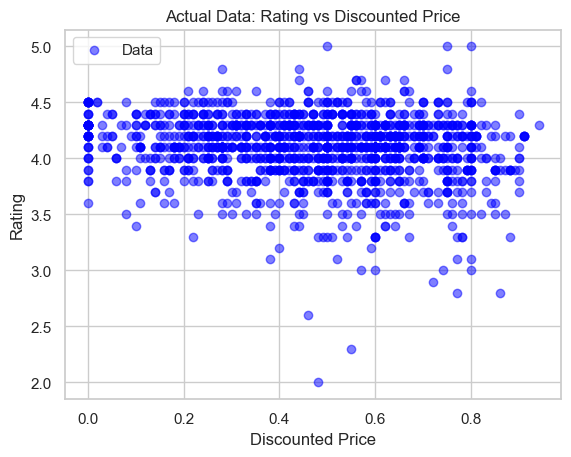

In [94]:

plt.scatter(X['discounted_price'], y, color='blue', alpha=0.5, label='Data')
plt.title('Actual Data: Rating vs Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1500x500 with 0 Axes>

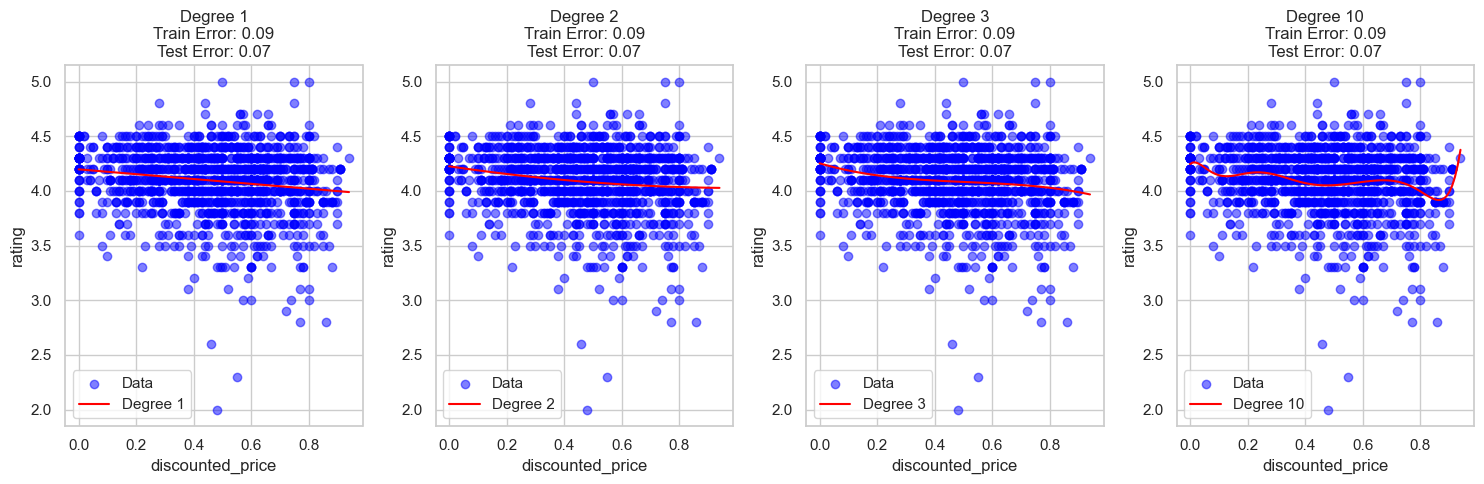

In [99]:
degrees = [1, 2, 3, 10]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # FIX: Use double brackets to get a DataFrame instead of Series
    model.fit(X_train[['discounted_price']], y_train)

    y_train_pred = model.predict(X_train[['discounted_price']])
    y_test_pred = model.predict(X_test[['discounted_price']])

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X['discounted_price'], y, color='blue', alpha=0.5, label='Data')

    X_plot = np.linspace(X['discounted_price'].min(), X['discounted_price'].max(), 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain Error: {train_error:.2f}\nTest Error: {test_error:.2f}')
    plt.xlabel('discounted_price')
    plt.ylabel('rating')
    plt.legend()

plt.tight_layout()
plt.show()

- Degree1: underfitting
- Degree2,3: good fitting
- Degree10: overfitting

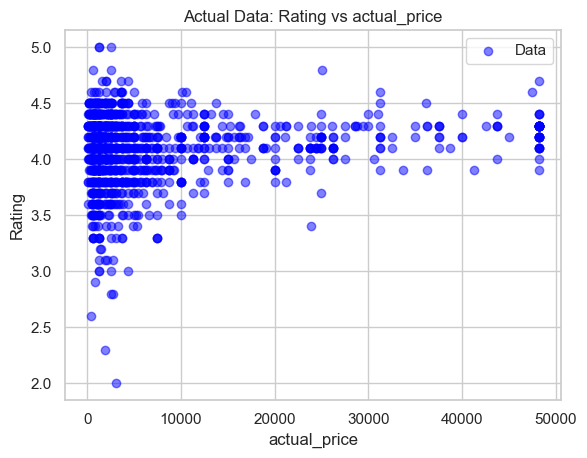

In [95]:
plt.scatter(X['actual_price'], y, color='blue', alpha=0.5, label='Data')
plt.title('Actual Data: Rating vs actual_price')
plt.xlabel('actual_price')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

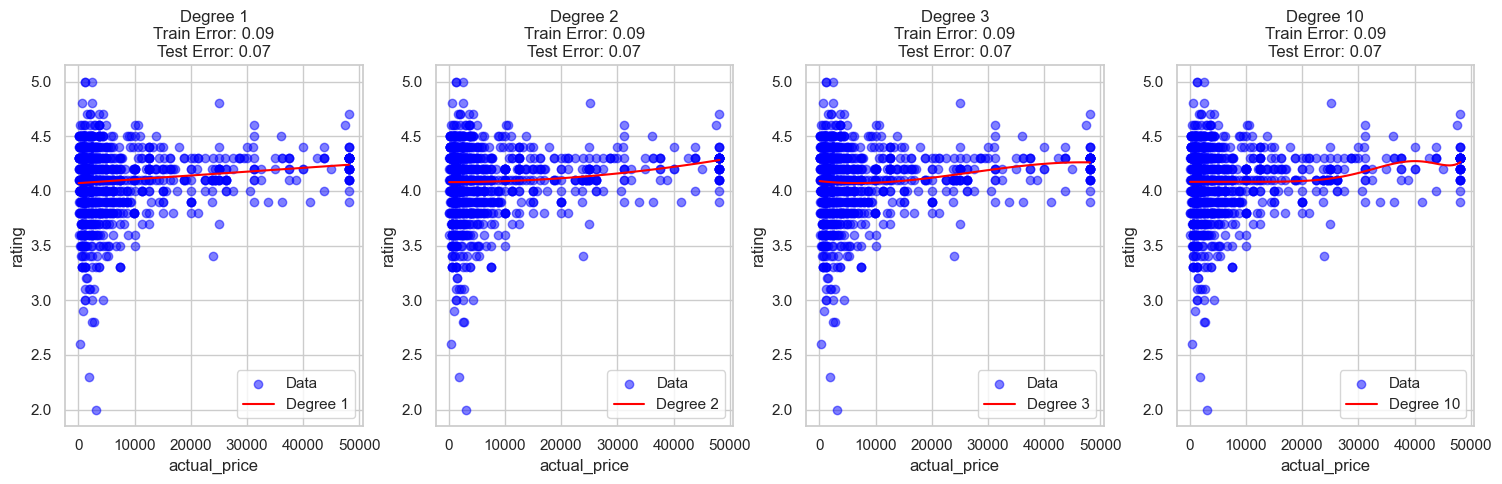

In [109]:
degrees = [1, 2, 3, 10]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # FIX: Use double brackets to get a DataFrame instead of Series
    model.fit(X_train[['actual_price']], y_train)

    y_train_pred = model.predict(X_train[['actual_price']])
    y_test_pred = model.predict(X_test[['actual_price']])

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X['actual_price'], y, color='blue', alpha=0.5, label='Data')

    X_plot = np.linspace(X['actual_price'].min(), X['actual_price'].max(), 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain Error: {train_error:.2f}\nTest Error: {test_error:.2f}')
    plt.xlabel('actual_price')
    plt.ylabel('rating')
    plt.legend()

plt.tight_layout()
plt.show()

- Degree 1, 2, 3: Good Fitting
- Degree10: overfitting

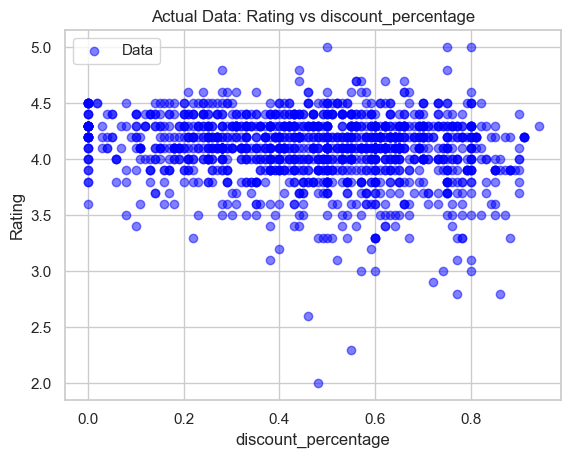

In [96]:

plt.scatter(X['discount_percentage'], y, color='blue', alpha=0.5, label='Data')
plt.title('Actual Data: Rating vs discount_percentage')
plt.xlabel('discount_percentage')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

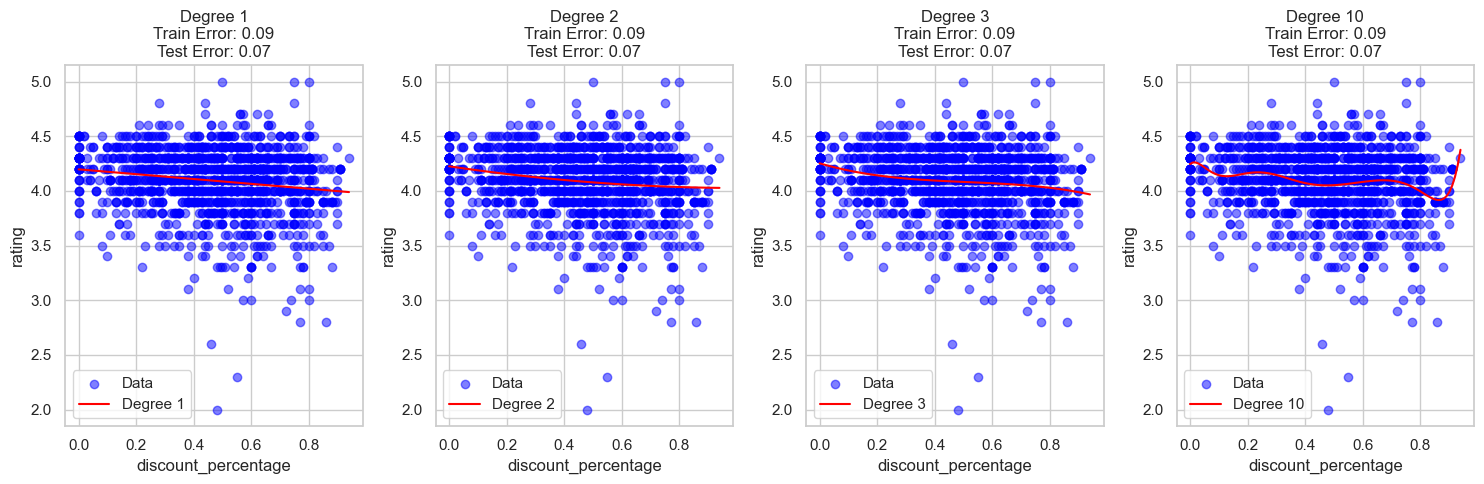

In [101]:
degrees = [1, 2, 3, 10]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # FIX: Use double brackets to get a DataFrame instead of Series
    model.fit(X_train[['discount_percentage']], y_train)

    y_train_pred = model.predict(X_train[['discount_percentage']])
    y_test_pred = model.predict(X_test[['discount_percentage']])

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X['discount_percentage'], y, color='blue', alpha=0.5, label='Data')

    X_plot = np.linspace(X['discount_percentage'].min(), X['discount_percentage'].max(), 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain Error: {train_error:.2f}\nTest Error: {test_error:.2f}')
    plt.xlabel('discount_percentage')
    plt.ylabel('rating')
    plt.legend()

plt.tight_layout()
plt.show()

- Degree 10: overfitting

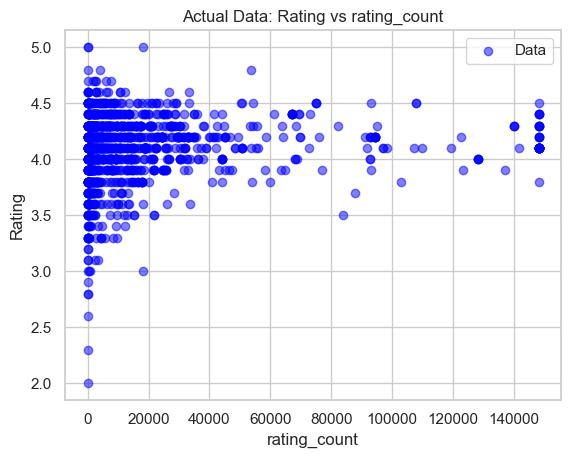

In [97]:

plt.scatter(X['rating_count'], y, color='blue', alpha=0.5, label='Data')
plt.title('Actual Data: Rating vs rating_count')
plt.xlabel('rating_count')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

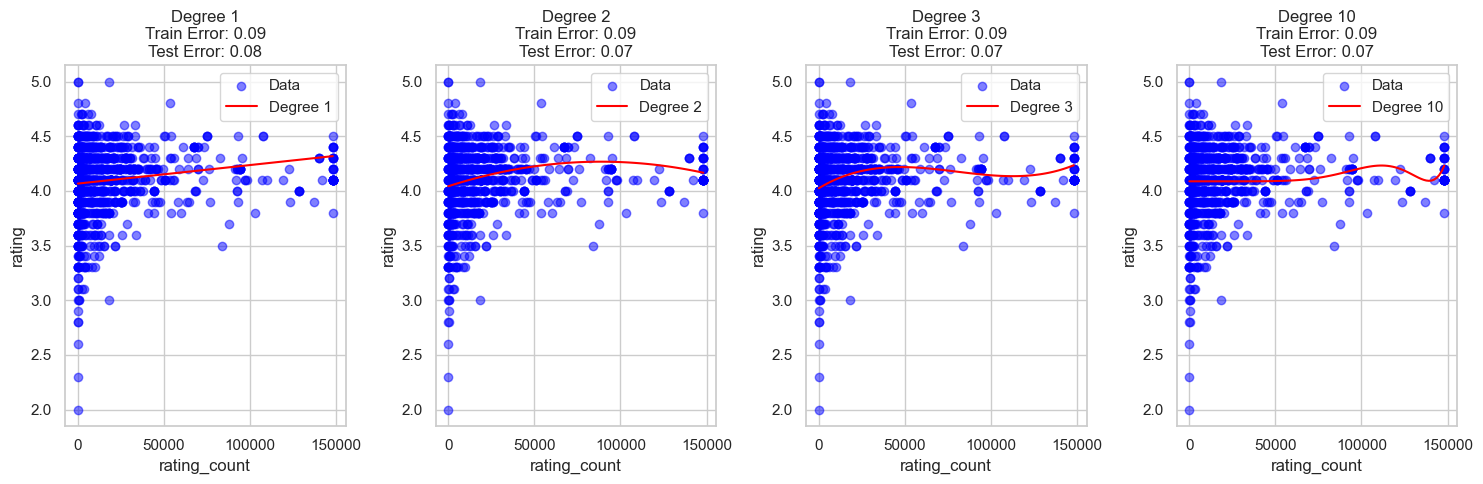

In [103]:
degrees = [1, 2, 3, 10]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # FIX: Use double brackets to get a DataFrame instead of Series
    model.fit(X_train[['rating_count']], y_train)

    y_train_pred = model.predict(X_train[['rating_count']])
    y_test_pred = model.predict(X_test[['rating_count']])

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X['rating_count'], y, color='blue', alpha=0.5, label='Data')

    X_plot = np.linspace(X['rating_count'].min(), X['rating_count'].max(), 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)

    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain Error: {train_error:.2f}\nTest Error: {test_error:.2f}')
    plt.xlabel('rating_count')
    plt.ylabel('rating')
    plt.legend()

plt.tight_layout()
plt.show()

- Degree1: underfitting
- Degree 2, 3: good fitting
- Degree 10: overfitting

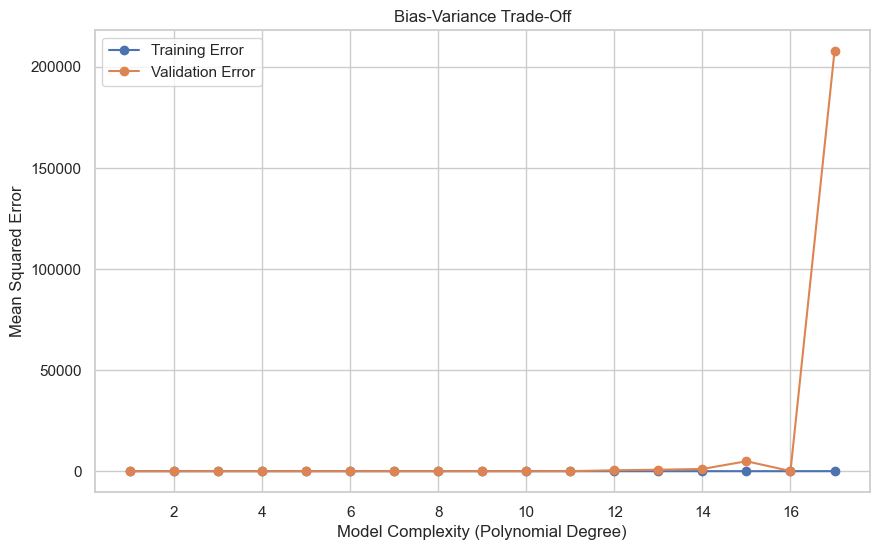

In [108]:
train_errors = []
test_errors = []
degrees = range(1, 18)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Validation Error', marker='o')
plt.title('Bias-Variance Trade-Off')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


- Degrees 1 to 14 :
  - training and testing errors are both low and stable, model learning well and generalizing to test data.
  - there is no strong overfitting or underfitting
- Degree 15-16:
   - slight overfitting
 
- Degree 17:
  huge jump in test error, while training error drops, models is momerizing training data but fails on new data 

In [112]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   amazon_sale.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [113]:
!git add amazon_sale.ipynb

In [114]:
!git commit -m "Bias-Variance Trade-Off code added"

[main 842aaf9] Bias-Variance Trade-Off code added
 1 file changed, 39 insertions(+), 4 deletions(-)
